# scikit learn

* data is split into x and y
* x is used to make predictions
* y is used as output to see predictions that are intented

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
X,y=load_diabetes(return_X_y=True)

y
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

#### data-->x,y-->model-->predictions

##### in model phase:
* create model <-- objects
* learn <--.fit(x,y)

In [5]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
#mod=KNeighborsRegressor()

pipe=Pipeline([
    ('scale',StandardScaler()),
    ('model',KNeighborsRegressor(n_neighbors=1))
])


'''
mod.fit(x,y)
pred=mod.predict(x)
pred

'''
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [6]:
pipe.fit(X,y)

,steps,"[('scale', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [7]:
mod=GridSearchCV(estimator=pipe,param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},cv=3)

In [8]:
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001913,0.000249,0.002614,0.000984,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,10
1,0.001385,0.000548,0.001505,0.000395,2,{'model__n_neighbors': 2},0.268889,0.339379,0.264563,0.290944,0.034295,9
2,0.000864,0.000061,0.001330,0.000168,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,8
3,0.000971,0.000194,0.001251,0.000078,4,{'model__n_neighbors': 4},0.342407,0.404701,0.409910,0.385673,0.030668,6
4,0.001123,0.000074,0.001426,0.000171,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,7
5,0.000800,0.000019,0.001186,0.000017,6,{'model__n_neighbors': 6},0.372665,0.389923,0.436389,0.399659,0.026911,5
6,0.000778,0.000003,0.001177,0.000005,7,{'model__n_neighbors': 7},0.412584,0.393681,0.446147,0.417471,0.021696,4
7,0.001038,0.000148,0.001461,0.000310,8,{'model__n_neighbors': 8},0.414478,0.409779,0.485850,0.436702,0.034806,3
8,0.000823,0.000008,0.001259,0.000011,9,{'model__n_neighbors': 9},0.414191,0.412035,0.528462,0.451563,0.054383,2
9,0.001014,0.000158,0.001461,0.000086,10,{'model__n_neighbors': 10},0.408989,0.405303,0.544371,0.452888,0.064706,1


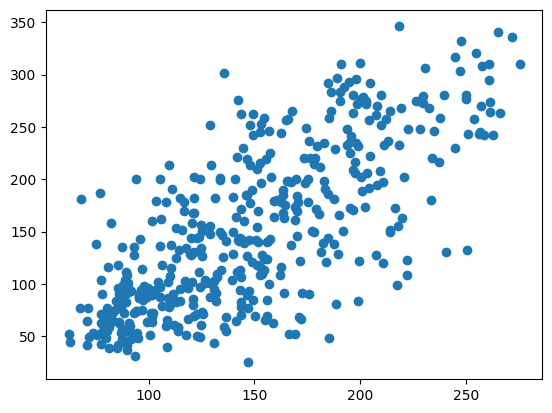

In [9]:
pred=mod.predict(X)

plt.scatter(pred,y)